# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read file using read_csv function

In [2]:
dataset=pd.read_csv('Housing Price.csv')

In [3]:
dataset.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
dataset['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

# Outliers Processing

<Axes: >

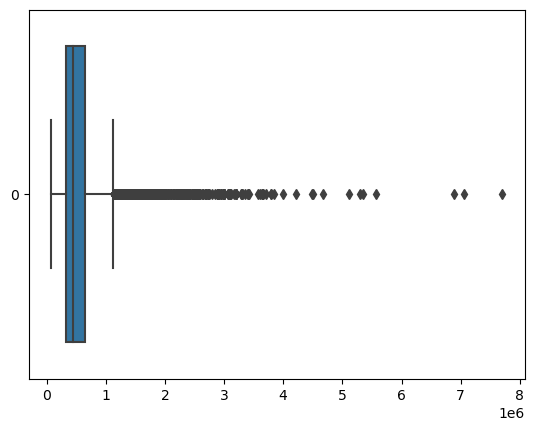

In [5]:
import seaborn as sns
sns.boxplot(dataset['Sale Price'],orient='h')

In [6]:
q1=dataset['Sale Price'].quantile(.25)
q3=dataset['Sale Price'].quantile(.75)

In [7]:
iqr=q3-q1
q1,q3,iqr

(321950.0, 645000.0, 323050.0)

In [8]:
lower_limit=q1-1.5*iqr
upper_limit=q1+1.5*iqr
lower_limit,upper_limit

(-162625.0, 806525.0)

In [9]:
dataset['Sale Price'].min()

75000.0

In [10]:
lower_limit=dataset['Sale Price'].min()
lower_limit

75000.0

In [11]:
def sale_limiter(values):
    if values > upper_limit:
        return upper_limit
    if values <lower_limit:
        return lower_limit
    else:
        return values

In [12]:
dataset['Sale Price']=dataset['Sale Price'].apply(sale_limiter)

<Axes: >

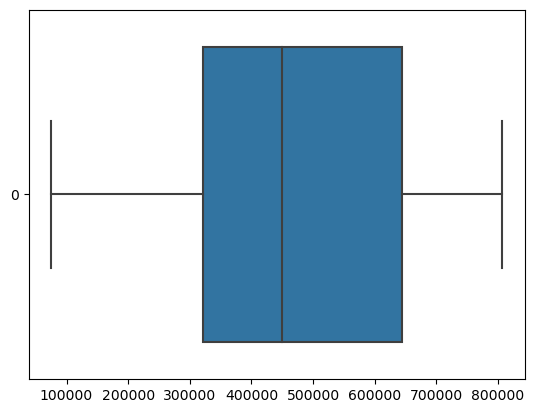

In [13]:
import seaborn as sns
sns.boxplot(dataset['Sale Price'],orient='h')

# Missing values handling

In [14]:
dataset.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [15]:
dataset.dropna(inplace=True,axis=0,subset='Sale Price')

In [16]:
dataset['Sale Price'].isnull().sum()

0

In [17]:
numerical_columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)'
                   ,'Area of the House from Basement (in Sqft)','Latitude','Longitude',
                  'Living Area after Renovation (in Sqft)']

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
Imputer = SimpleImputer(missing_values=np.nan,strategy='median')

In [20]:
dataset[numerical_columns]=Imputer.fit_transform(dataset[numerical_columns])

In [21]:
dataset[numerical_columns].isnull().sum()

No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
Area of the House from Basement (in Sqft)    0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
dtype: int64

In [22]:
dataset['Zipcode'].shape

(21609,)

In [23]:
column=dataset['Zipcode'].values.reshape(-1,1)

In [24]:
column.shape

(21609, 1)

In [25]:
column=dataset['Zipcode'].values.reshape(-1,1)
Imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
dataset['Zipcode']=Imputer.fit_transform(column)

In [26]:
dataset['Zipcode'].isnull().sum()

0

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Feature Engineering

In [28]:
dataset['No of Times Visited'].value_counts()

None      19485
Twice       963
Thrice      510
Once        332
Four        319
Name: No of Times Visited, dtype: int64

In [29]:
mapping=({'None':0,
         'Once':1,
         'Twice':2,
         'Thrice':3,
         'Four':4})

In [30]:
dataset['No of Times Visited']=dataset['No of Times Visited'].map(mapping)

In [31]:
dataset['No of Times Visited'].value_counts()

0    19485
2      963
3      510
1      332
4      319
Name: No of Times Visited, dtype: int64

In [32]:
dataset['Ever Renoveted']=np.where(dataset['Renovated Year']==0,'No','Yes')

In [33]:
dataset['Purchased Year']=pd.DatetimeIndex(dataset['Date House was Sold']).year

In [34]:
dataset['Year Since Renovation']=np.where(dataset['Ever Renoveted']=='Yes',
                                          abs(dataset['Purchased Year']-dataset['Renovated Year']),0)

In [35]:
dataset.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renoveted,Purchased Year,Year Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [36]:
dataset.drop(columns=['Date House was Sold','Purchased Year','Ever Renoveted'],axis=0,inplace=True)

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [38]:
dataset=pd.get_dummies(dataset,columns=['Waterfront View'],drop_first=True)

In [39]:
dataset['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [40]:
mapping=({'Bad':1,
         'Okay':2,
         'Fair':3,
         'Good':4,
         'Excellent':5})

In [41]:
dataset['Condition of the House']=dataset['Condition of the House'].map(mapping)

In [42]:
dataset['Condition of the House'].value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  int64  
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [44]:
zip_table=dataset.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending=True)

In [45]:
zip_table['Zipcode_group']=pd.cut(zip_table['Sale Price'],bins=10,
                                 labels=['Zipcode_Group_0',
                                        'Zipcode_Group_1',
                                        'Zipcode_Group_2',
                                        'Zipcode_Group_3',
                                         'Zipcode_Group_4',
                                         'Zipcode_Group_5',
                                         'Zipcode_Group_6',
                                         'Zipcode_Group_7',
                                         'Zipcode_Group_8',
                                         'Zipcode_Group_9'],include_lowest=True)

In [46]:
zip_table=zip_table.drop(columns='Sale Price')

In [47]:
dataset=pd.merge(dataset,
                 zip_table,
                left_on='Zipcode',
                how='left',
                right_index=True)

In [48]:
dataset=dataset.drop(columns='Zipcode')

In [49]:
dataset.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Waterfront View_Yes,Zipcode_group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,3,7,...,0,63,0,47.5112,-122.257,1340.0,5650,0,0,Zipcode_Group_1
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,3,7,...,400,67,1991,47.7210,-122.319,1690.0,7639,26,0,Zipcode_Group_3
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,3,6,...,0,85,0,47.7379,-122.233,2720.0,8062,0,0,Zipcode_Group_3
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,5,7,...,910,53,0,47.5208,-122.393,1360.0,5000,0,0,Zipcode_Group_5
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,3,8,...,0,31,0,47.6168,-122.045,1800.0,7503,0,0,Zipcode_Group_7


In [50]:
dataset=pd.get_dummies(dataset,columns=['Zipcode_group'],drop_first=True)

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  int64  
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

# Feature Transformation

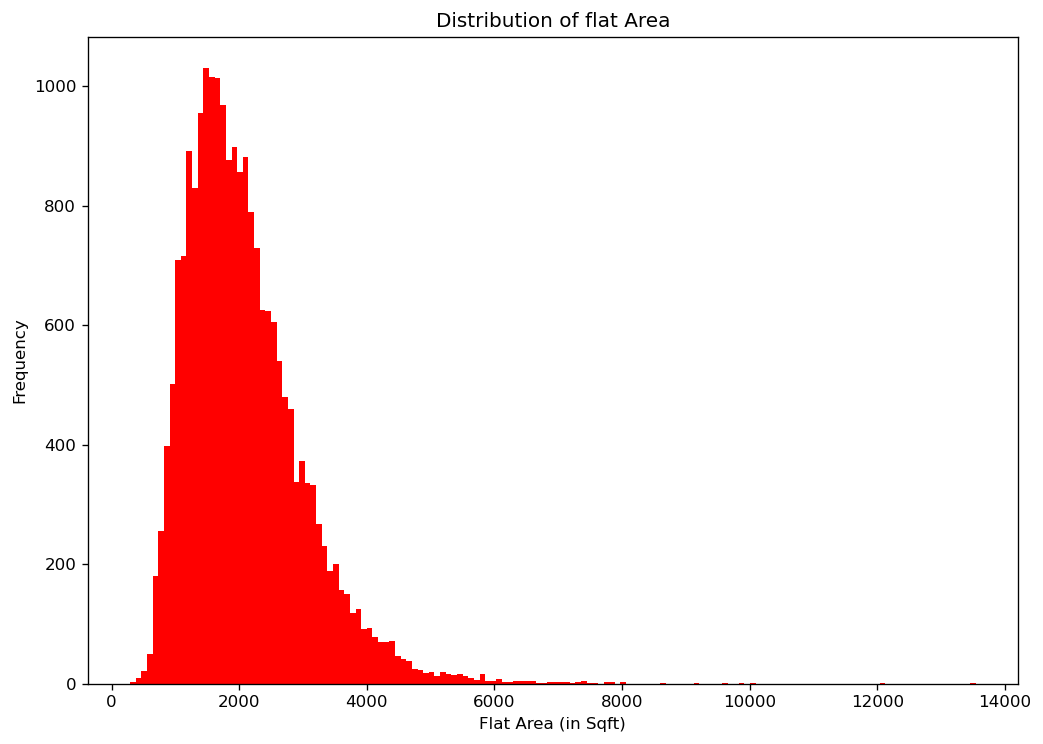

In [52]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(dataset['Flat Area (in Sqft)'],bins=150,color='red')
plt.xlabel('Flat Area (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of flat Area')
plt.show()

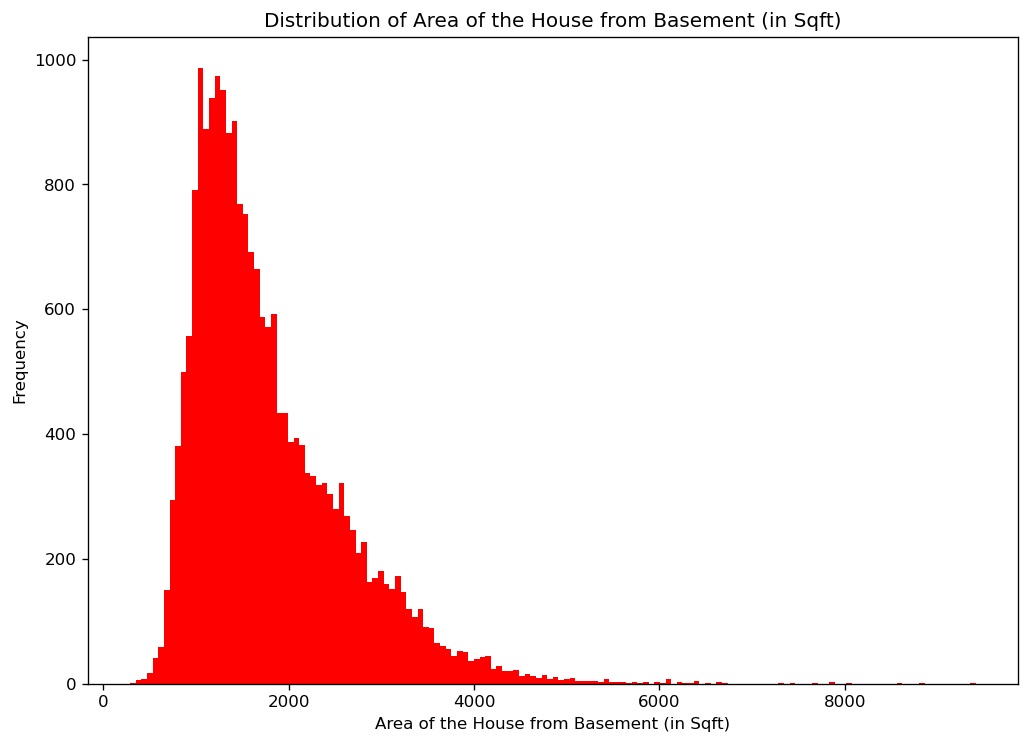

In [53]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(dataset['Area of the House from Basement (in Sqft)'],bins=150,color='red')
plt.xlabel('Area of the House from Basement (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Area of the House from Basement (in Sqft)')
plt.show()

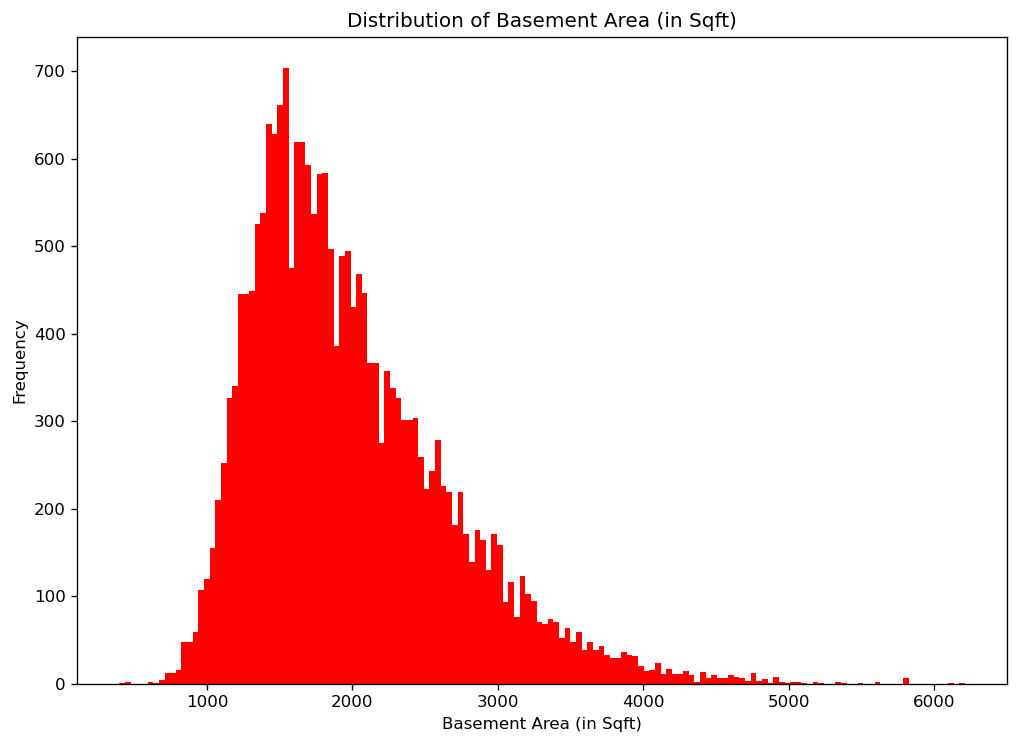

In [54]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(dataset['Living Area after Renovation (in Sqft)'],bins=150,color='red')
plt.xlabel('Basement Area (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Basement Area (in Sqft)')
plt.show()

In [55]:
def log_transform(sample_data):
    return np.log(sample_data)

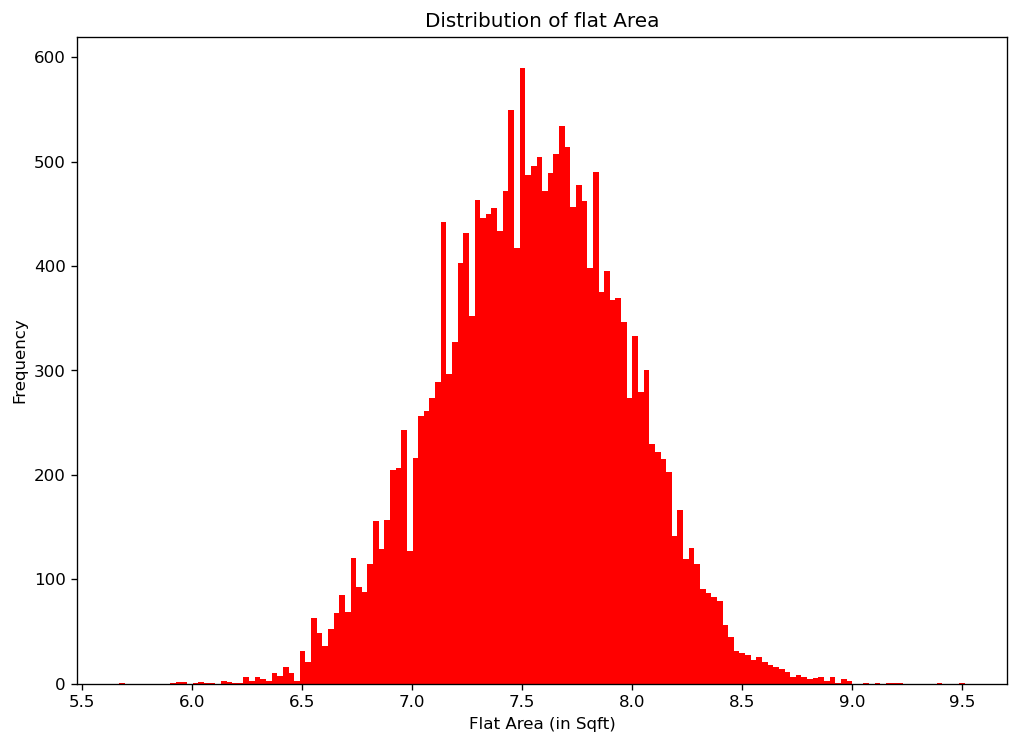

In [56]:
dataset['Flat Area (in Sqft)']=dataset['Flat Area (in Sqft)'].map(log_transform)
plt.figure(figsize=(10,7),dpi=120)
plt.hist(dataset['Flat Area (in Sqft)'],bins=150,color='red')
plt.xlabel('Flat Area (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of flat Area')
plt.show()

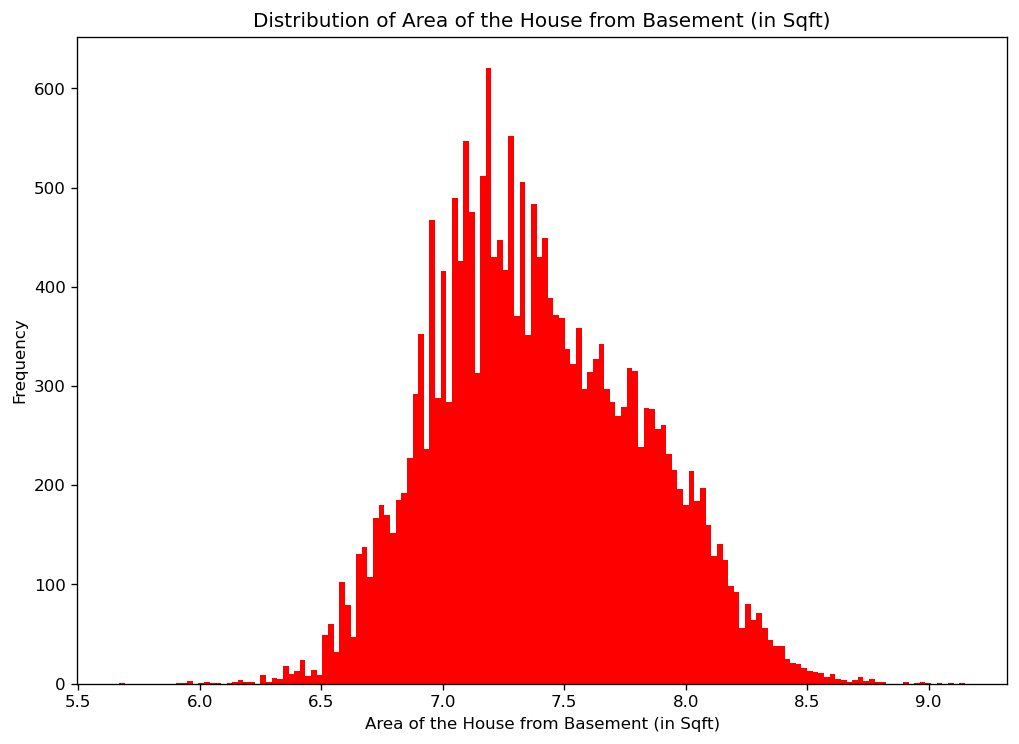

In [57]:
dataset['Area of the House from Basement (in Sqft)']=dataset['Area of the House from Basement (in Sqft)'].map(log_transform)
plt.figure(figsize=(10,7),dpi=120)
plt.hist(dataset['Area of the House from Basement (in Sqft)'],bins=150,color='red')
plt.xlabel('Area of the House from Basement (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Area of the House from Basement (in Sqft)')
plt.show()

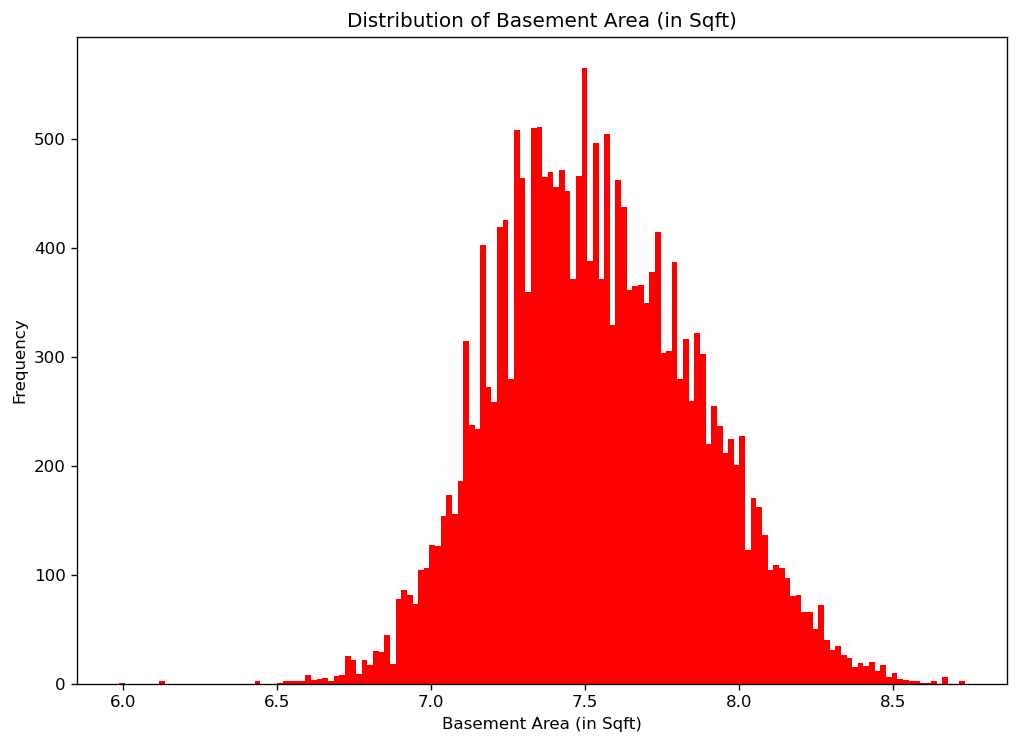

In [58]:
dataset['Living Area after Renovation (in Sqft)']=dataset['Living Area after Renovation (in Sqft)'].map(log_transform)
plt.figure(figsize=(10,7),dpi=120)
plt.hist(dataset['Living Area after Renovation (in Sqft)'],bins=150,color='red')
plt.xlabel('Basement Area (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Basement Area (in Sqft)')
plt.show()

# Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler


In [60]:
Scalar=StandardScaler()
Y=dataset['Sale Price']
X=Scalar.fit_transform(dataset.drop(columns=['Sale Price']))
X=pd.DataFrame(data=X,columns=dataset.drop(columns=['Sale Price']).columns)
X.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront View_Yes,Zipcode_group_Zipcode_Group_1,Zipcode_group_Zipcode_Group_2,Zipcode_group_Zipcode_Group_3,Zipcode_group_Zipcode_Group_4,Zipcode_group_Zipcode_Group_5,Zipcode_group_Zipcode_Group_6,Zipcode_group_Zipcode_Group_7,Zipcode_group_Zipcode_Group_8,Zipcode_group_Zipcode_Group_9
0,0.885986,-0.398724,-1.447526,-1.123272,-0.228291,-0.915389,-0.30579,-0.629203,-0.563993,-0.752122,...,-0.087181,2.323956,-0.376113,-0.348647,-0.32453,-0.419752,-0.362601,-0.337185,-0.209073,-0.175965
1,0.637358,-0.398724,0.175684,0.709431,-0.189858,0.936817,-0.30579,-0.629203,-0.563993,0.672689,...,-0.087181,-0.430301,-0.376113,2.868228,-0.32453,-0.419752,-0.362601,-0.337185,-0.209073,-0.175965
2,0.365299,-1.474115,-1.447526,-2.128348,-0.123276,-0.915389,-0.30579,-0.629203,-1.468566,-1.750497,...,-0.087181,-0.430301,-0.376113,2.868228,-0.32453,-0.419752,-0.362601,-0.337185,-0.209073,-0.175965
3,-0.727767,0.676667,1.149611,0.071459,-0.243983,-0.915389,-0.30579,2.444136,-0.563993,-1.025114,...,-0.087181,-0.430301,-0.376113,-0.348647,-0.32453,2.382357,-0.362601,-0.337185,-0.209073,-0.175965
4,-0.912987,-0.398724,-0.148958,-0.291485,-0.169628,-0.915389,-0.30579,-0.629203,0.340581,0.074118,...,-0.087181,-0.430301,-0.376113,-0.348647,-0.32453,-0.419752,-0.362601,2.965731,-0.209073,-0.175965


# Correlation

In [61]:
X.corr()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront View_Yes,Zipcode_group_Zipcode_Group_1,Zipcode_group_Zipcode_Group_2,Zipcode_group_Zipcode_Group_3,Zipcode_group_Zipcode_Group_4,Zipcode_group_Zipcode_Group_5,Zipcode_group_Zipcode_Group_6,Zipcode_group_Zipcode_Group_7,Zipcode_group_Zipcode_Group_8,Zipcode_group_Zipcode_Group_9
ID,1.000000,0.001450,0.005233,-0.001891,-0.132153,0.018653,0.011552,-0.023837,0.013762,-0.001392,...,-0.002733,-0.007162,-0.028721,-0.008718,0.009389,-0.007404,0.067227,-0.024903,0.002927,-0.019595
No of Bedrooms,0.001450,1.000000,0.515813,0.620788,0.031692,0.175536,0.079575,0.028556,0.349223,0.514917,...,-0.006578,-0.027513,-0.028685,-0.045681,0.028235,-0.069193,0.007764,0.064118,0.067687,0.108865
No of Bathrooms,0.005233,0.515813,1.000000,0.761225,0.087732,0.500776,0.187791,-0.124891,0.635638,0.694711,...,0.063761,-0.078786,-0.070889,-0.063919,0.047497,-0.038067,0.065110,0.108314,0.104755,0.124921
Flat Area (in Sqft),-0.001891,0.620788,0.761225,1.000000,0.148739,0.367863,0.246770,-0.048342,0.721705,0.865043,...,0.079324,-0.100972,-0.088472,-0.054137,0.044422,-0.065681,0.069603,0.130251,0.133477,0.161361
Lot Area (in Sqft),-0.132153,0.031692,0.087732,0.148739,1.000000,-0.005162,0.074668,-0.009049,0.102314,0.162421,...,0.021605,0.029891,-0.015631,0.059280,0.036424,-0.038542,0.007519,-0.043473,-0.009984,-0.006005
No of Floors,0.018653,0.175536,0.500776,0.367863,-0.005162,1.000000,0.029504,-0.263669,0.461368,0.547594,...,0.023719,-0.086280,-0.045005,-0.044931,0.036612,0.047610,0.085195,0.057545,0.079903,-0.006652
No of Times Visited,0.011552,0.079575,0.187791,0.246770,0.074668,0.029504,1.000000,0.045978,0.223661,0.158648,...,0.401856,-0.005847,-0.067547,0.014017,0.009148,0.047956,-0.059250,0.074200,0.002989,0.066480
Condition of the House,-0.023837,0.028556,-0.124891,-0.048342,-0.009049,-0.263669,0.045978,1.000000,-0.143747,-0.149256,...,0.016650,-0.007508,-0.008747,-0.003649,-0.029567,0.041164,-0.050628,0.024365,0.005126,0.057189
Overall Grade,0.013762,0.349223,0.635638,0.721705,0.102314,0.461368,0.223661,-0.143747,1.000000,0.722005,...,0.070332,-0.145607,-0.120527,-0.089444,-0.002533,-0.009646,0.120099,0.187427,0.175484,0.164656
Area of the House from Basement (in Sqft),-0.001392,0.514917,0.694711,0.865043,0.162421,0.547594,0.158648,-0.149256,0.722005,1.000000,...,0.060711,-0.071666,-0.084512,-0.044130,0.062400,-0.104654,0.086647,0.095528,0.128376,0.139314


# MultiCollinearity Removal 

In [62]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns 
    if (k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif_data=X
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

ID                                            1.034701
No of Bedrooms                                1.780149
No of Bathrooms                               3.296379
Flat Area (in Sqft)                          33.233858
Lot Area (in Sqft)                            2.103495
No of Floors                                  2.143259
No of Times Visited                           1.459237
Condition of the House                        1.250599
Overall Grade                                 3.096897
Area of the House from Basement (in Sqft)    27.509658
Basement Area (in Sqft)                       8.453412
Age of House (in Years)                       2.514895
Renovated Year                                2.878971
Latitude                                      2.528386
Longitude                                     1.849709
Living Area after Renovation (in Sqft)        2.881617
Lot Area after Renovation (in Sqft)           2.148664
Year Since Renovation                         2.729620
Waterfront

In [65]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [66]:
def multicollinearity_remover(data):
    vif=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
    if vif.max() > 5:
        print(vif[vif==vif.max()].index[0],' has been Removed')
        data=data.drop(columns=vif[vif==vif.max()].index[0])
        return data
    else:
        print('No colinearity present anymore')
        return data

In [67]:
for i in range (3) :
    vif_data=multicollinearity_remover(vif_data)

vif_data.head()

Flat Area (in Sqft)  has been Removed
No colinearity present anymore
No colinearity present anymore


,ID,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront View_Yes,Zipcode_group_Zipcode_Group_1,Zipcode_group_Zipcode_Group_2,Zipcode_group_Zipcode_Group_3,Zipcode_group_Zipcode_Group_4,Zipcode_group_Zipcode_Group_5,Zipcode_group_Zipcode_Group_6,Zipcode_group_Zipcode_Group_7,Zipcode_group_Zipcode_Group_8,Zipcode_group_Zipcode_Group_9
0,0.885986,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.629203,-0.563993,-0.752122,-0.658697,...,-0.087181,2.323956,-0.376113,-0.348647,-0.32453,-0.419752,-0.362601,-0.337185,-0.209073,-0.175965
1,0.637358,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.629203,-0.563993,0.672689,0.245134,...,-0.087181,-0.430301,-0.376113,2.868228,-0.32453,-0.419752,-0.362601,-0.337185,-0.209073,-0.175965
2,0.365299,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-0.629203,-1.468566,-1.750497,-0.658697,...,-0.087181,-0.430301,-0.376113,2.868228,-0.32453,-0.419752,-0.362601,-0.337185,-0.209073,-0.175965
3,-0.727767,0.676667,1.149611,-0.243983,-0.915389,-0.30579,2.444136,-0.563993,-1.025114,1.397518,...,-0.087181,-0.430301,-0.376113,-0.348647,-0.32453,2.382357,-0.362601,-0.337185,-0.209073,-0.175965
4,-0.912987,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,-0.629203,0.340581,0.074118,-0.658697,...,-0.087181,-0.430301,-0.376113,-0.348647,-0.32453,-0.419752,-0.362601,2.965731,-0.209073,-0.175965


In [68]:
X=vif_data
Y=dataset['Sale Price']

# Spliting Dataset into test and train

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15126, 27), (6483, 27), (15126,), (6483,))

# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr=LinearRegression()

In [73]:
lr.fit(X_train,y_train)

LinearRegression()

# R2 Score for Model

In [74]:
lr.score(X_test,y_test)

0.827953701548555

In [75]:
lr.coef_

array([  1781.81399508,  -1561.12180396,   7867.5715561 ,  14021.81162756,
         2211.90604141,  14251.7742481 ,  10394.02220496,  43775.40660212,
        58775.75558508,  19304.52960125,  22561.2510407 ,  10203.71240017,
        19381.72533868, -19627.73923927,  18643.33552133,  -1283.30810568,
        -7667.40452887,   4121.03304223,  12066.76412858,  25600.2163345 ,
        36317.59812112,  42758.8598936 ,  75433.18962727,  74715.66985271,
        77201.12956099,  55482.4687585 ,  52136.80549971])

In [76]:
prediction=lr.predict(X_test)

# Verifying assumptions of Linear Regression

In [77]:
residuals=prediction-y_test
residual_table=pd.DataFrame({'residuals':residuals,
                            'prediction':prediction})
residual_table=residual_table.sort_values(by='prediction')

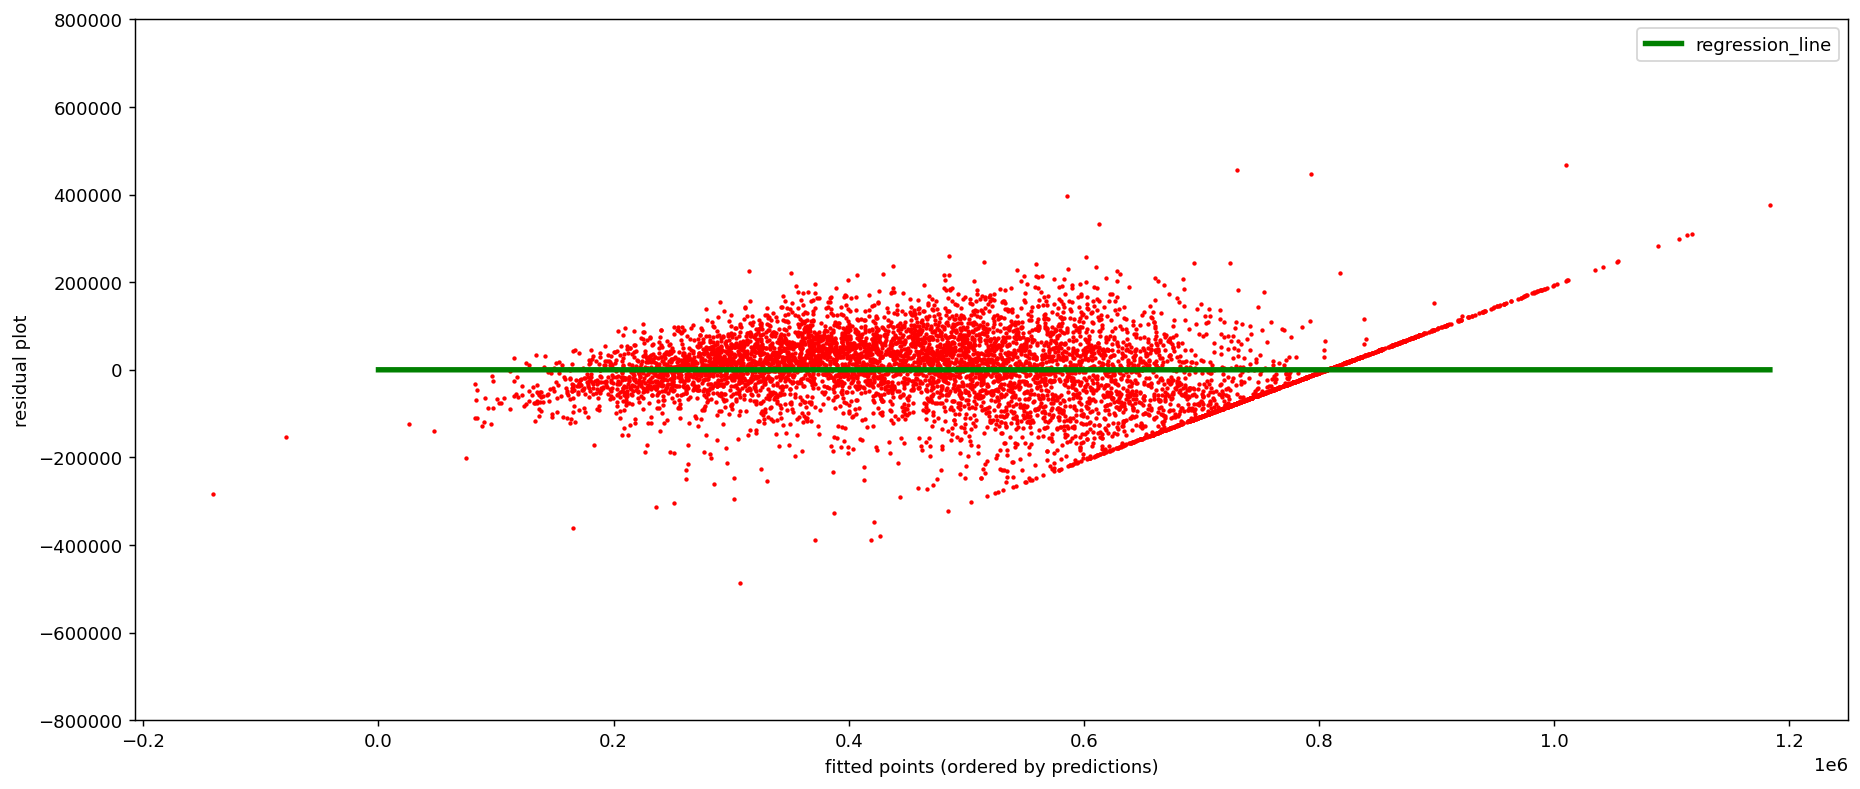

In [78]:
z=[i for i in range(int(residual_table['prediction'].max()))]
k=[0 for i in range(int(residual_table['prediction'].max()))]
plt.figure(dpi=130,figsize=(17,7))
plt.scatter(residual_table['prediction'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color='green',linewidth=3,label='regression_line')
plt.ylim(-800000,800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residual plot')
plt.legend()
plt.show()

# Distribution of Residuals

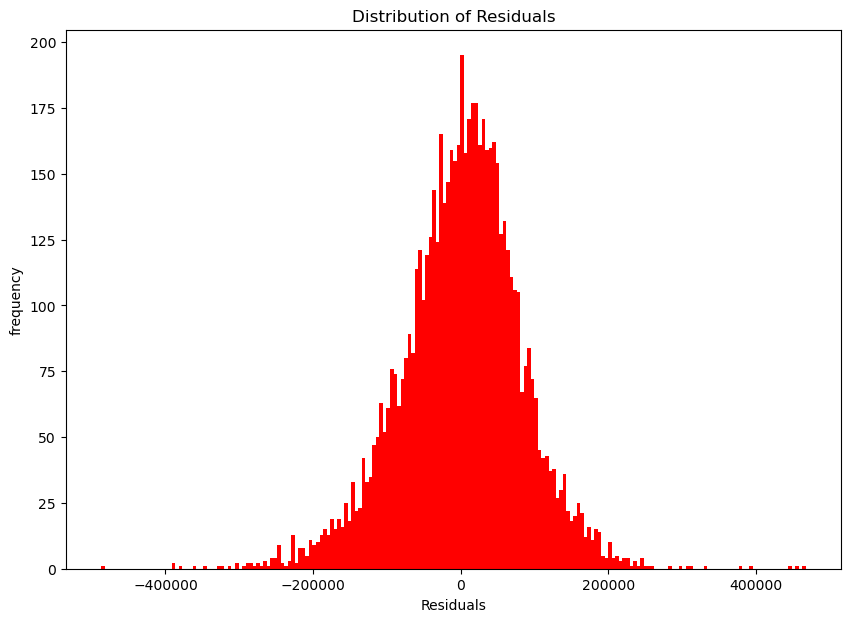

In [79]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residual_table['residuals'],color='red',bins=200)
plt.xlabel('Residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residuals')
plt.show()


in above plot the Residual distribution is normal , so the model is working well

# Analysis of effect of independent variables on Target variable

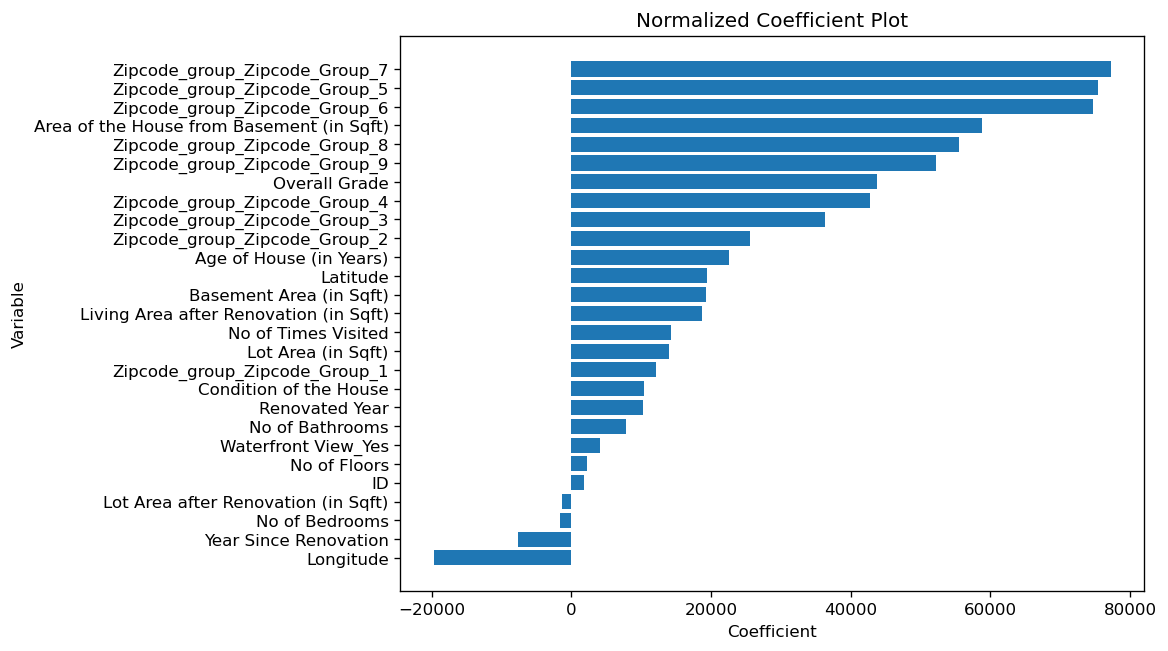

In [80]:
coeff_table=pd.DataFrame({'column':X_train.columns,
                         'coefficients':lr.coef_})
coeff_table=coeff_table.sort_values(by='coefficients')
plt.figure(figsize=(8,6),dpi=120)
x=coeff_table['column']
y=coeff_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Normalized Coefficient Plot')
plt.show()

According to this plot ->
fetures like Overall Grade, Age of House(in Years),no of floors etc have positive effect on the model ,
and features like No of Bedrooms,Longitude etc have negative effect on the model